## Tratamento de dados - AFM

Nesse documento, será abordado o tratamento de dados realizado a partir da caracterização de quatro amostras (controle sem gel, controle com gel, amostra contendo GO e amostra contendo rGO). Os dados foram obtidos pelo modo de força-distância do AFM, em que a ponta é aproximada a um ponto fixo e é medida a sua deflexão por meio de um laser.

In [440]:
# importando os dados utilizados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Código para ler o arquivo em xls e retorná-lo em dataframe
df_cont_g = pd.read_excel("FDC Cont.xlsx")
df_cont_sg = pd.read_excel("FDC unha sem gel.xlsx")
df_GO = pd.read_excel("FDC GO.xlsx")
df_rGO = pd.read_excel("FDC GOred.xlsx")

In [441]:
# é preciso diferenciar os dados da aproximação e da retração.

for i in range(len(df_cont_g)):
    x_A = float(df_cont_g["Z approach"][i])
    x_R = float(df_cont_g["Z retract"][i])
    
    if x_A > 1000:
        df_cont_g["Z approach"][i] = str(x_A/1000)
        
    if x_R > 1000:
        df_cont_g["Z retract"][i] = str(x_R/1000)

In [442]:
for i in range(len(df_cont_sg)):
    x_A = float(df_cont_sg["Z approach"][i])
    x_R = float(df_cont_sg["Z retract"][i])
    
    if x_A > 1000:
        df_cont_sg["Z approach"][i] = str(x_A/1000)
        
    if x_R > 1000:
        df_cont_sg["Z retract"][i] = str(x_R/1000)

In [443]:
for i in range(len(df_GO)):
    x_A = float(df_GO["Z approach"][i])
    x_R = float(df_GO["Z retract"][i])
    
    if x_A > 1000:
        df_GO["Z approach"][i] = str(x_A/1000)
        
    if x_R > 1000:
        df_GO["Z retract"][i] = str(x_R/1000)

In [444]:
for i in range(len(df_rGO)):
    x_A = float(df_rGO["Z approach"][i])
    x_R = float(df_rGO["Z retract"][i])
    
    if x_A > 1000:
        df_rGO["Z approach"][i] = str(x_A/1000)
        
    if x_R > 1000:
        df_rGO["Z retract"][i] = str(x_R/1000)

#### Amostra Controle

Primeiro, foi necessário entender como estavam os dados obtidos.

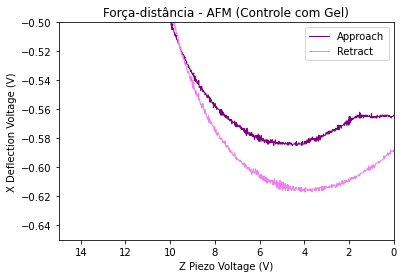

In [445]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
df_cont_g.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax1, kind = 'line', linewidth = 1, color = 'purple')
df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax1, kind = 'line', linewidth = 1, color = 'violet')
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(14.981, 0)
plt.ylim(-0.65, -0.5)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

Então, foi necessário alinhar a linha zero com o eixo das abscissas.

In [446]:
logic = df_cont_g["Z approach"] <= 1.5
linha_zero_cont_g = df_cont_g["def X approach"].loc[logic].mean()
novo_valor_y = df_cont_g["def X approach"].values - linha_zero_cont_g
df_cont_g["def X approach"] = novo_valor_y

novo_valor_y = df_cont_g["def X retract"].values - linha_zero_cont_g
df_cont_g["def X retract"] = novo_valor_y

E, então, é possível visualizar como ficaram os dados.

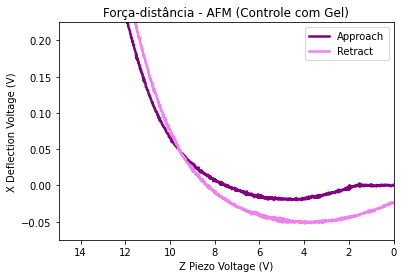

In [447]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
df_cont_g.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax2, kind = 'line', linewidth = 2.5, color = 'purple')
df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax2, kind = 'line', linewidth = 2.5, color = 'violet')
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(14.981, 0)
plt.ylim(-0.075, 0.225)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

Para a análise da Força de Adesão da amostra é necessário encontrar a região mínima desses dados. Para tal, a região dos menores valores do gráfico será aproximada para um polinômio de segundo grau para, então, encontrar-se o ponto mínimo dessa função polinomial.

In [448]:
df_setor_minimos_approach_cont_g = df_cont_g.loc[df_cont_g['def X approach'] < -0.01]

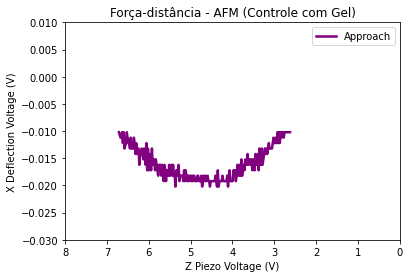

In [449]:
fig23 = plt.figure()
ax23 = fig23.add_subplot(111)
df_setor_minimos_approach_cont_g.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax23, kind = 'line', linewidth = 2.5, color = 'purple')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(8, 0)
plt.ylim(-0.03, 0.01)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

In [450]:
x = np.array(df_setor_minimos_approach_cont_g['Z approach'])
y = list(df_setor_minimos_approach_cont_g['def X approach'])

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

print(poly_reg_model.coef_)

print(poly_reg_model.intercept_)

a = poly_reg_model.coef_[1]

b = poly_reg_model.coef_[0]

c = poly_reg_model.intercept_

y_predicted = poly_reg_model.predict(poly_features)

#y_predicted

Z_approach_cont_g_min = [-b/(2*a)]

def_X_approach_cont_g_min = [-(b**2 - 4*a*c)/(4*a)]

print(Z_approach_cont_g_min, def_X_approach_cont_g_min)

[-0.02146336  0.00227728]
0.03150416344763564
[4.712501486775299] [-0.01906889923717267]


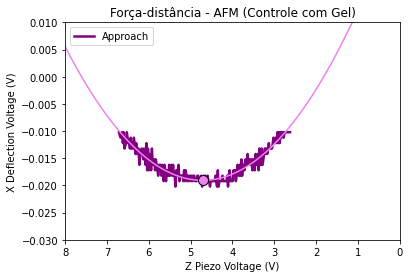

In [451]:
def I(t):
    return c + b*t + a*(t**2)

t = np.linspace(0, 15, 100)

fig231 = plt.figure()
ax231 = fig231.add_subplot(111)
df_setor_minimos_approach_cont_g.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax231, kind = 'line', linewidth = 2.5, color = 'purple')
plt.plot(t, I(t), color='violet')
#plt.plot(x, y_predicted, c = 'red')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_approach_cont_g_min, def_X_approach_cont_g_min, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="violet")
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(8, 0)
plt.ylim(-0.03, 0.01)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

In [452]:
limite = df_cont_g.loc[799]['def X retract']

df_setor_minimos_retract_cont_g = df_cont_g.loc[df_cont_g['def X retract'] < limite]

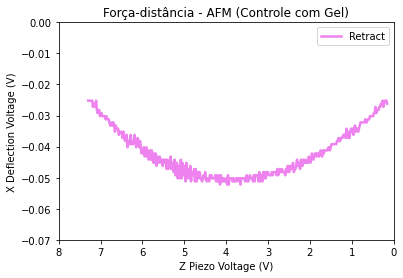

In [453]:
fig24 = plt.figure()
ax24 = fig24.add_subplot(111)
df_setor_minimos_retract_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax24, kind = 'line', linewidth = 2.5, color = 'violet')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(8, 0)
plt.ylim(-0.07, 0)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

In [454]:
x = np.array(df_setor_minimos_retract_cont_g['Z retract'])
y = list(df_setor_minimos_retract_cont_g['def X retract'])

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

print(poly_reg_model.coef_)

print(poly_reg_model.intercept_)

a_ret = poly_reg_model.coef_[1]

b_ret = poly_reg_model.coef_[0]

c_ret = poly_reg_model.intercept_

y_predicted = poly_reg_model.predict(poly_features)

#y_predicted

Z_retract_cont_g_min = [-b_ret/(2*a_ret)]

def_X_retract_cont_g_min = [-(b_ret**2 - 4*a_ret*c_ret)/(4*a_ret)]


print(Z_retract_cont_g_min, def_X_retract_cont_g_min)

[-0.01516896  0.00201349]
-0.022091711054760668
[3.7668372368509804] [-0.050661207349687515]


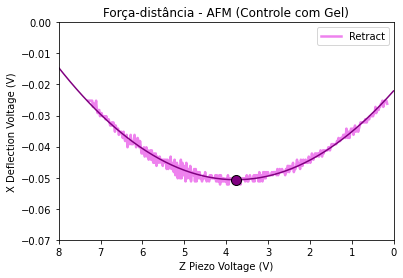

In [455]:
def I_ret(t):
    return c_ret + b_ret*t + a_ret*(t**2)

t = np.linspace(0, 15, 100)

fig232 = plt.figure()
ax232 = fig232.add_subplot(111)
df_setor_minimos_retract_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax232, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(t, I_ret(t), color='purple')
#plt.plot(x, y_predicted, c = 'red')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_retract_cont_g_min, def_X_retract_cont_g_min, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="purple")
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(8, 0)
plt.ylim(-0.07, 0)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

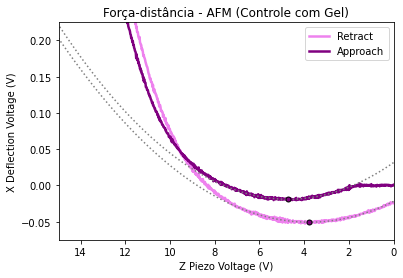

In [456]:
fig312 = plt.figure()
ax312 = fig312.add_subplot(111)
df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax312, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(t, I_ret(t), color='gray', linestyle='dotted')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax3, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_retract_cont_g_min, def_X_retract_cont_g_min, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="purple")
df_cont_g.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax312, kind = 'line', linewidth = 2.5, color = 'purple')
plt.plot(t, I(t), color='gray', linestyle='dotted')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax3, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_approach_cont_g_min, def_X_approach_cont_g_min, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="purple")
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(14.981, 0)
plt.ylim(-0.075, 0.225)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

#### Amostra GO

Primeiro, foi necessário entender como estavam os dados obtidos.

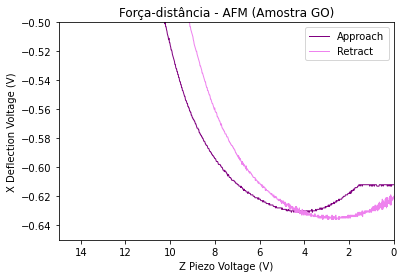

In [457]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
df_GO.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax4, kind = 'line', linewidth = 1, color = 'purple')
df_GO.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax4, kind = 'line', linewidth = 1, color = 'violet')
plt.title('Força-distância - AFM (Amostra GO)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(14.981, 0)
plt.ylim(-0.65, -0.5)
#plt.savefig('Força-distância - AFM (Amostra GO).png', dpi=100, format='png', facecolor='white')
plt.show()

In [458]:
logic = df_GO["Z approach"] <= 1.5
linha_zero_GO = df_GO["def X approach"].loc[logic].mean()
novo_valor_y = df_GO["def X approach"].values - linha_zero_GO
df_GO["def X approach"] = novo_valor_y

novo_valor_y = df_GO["def X retract"].values - linha_zero_GO
df_GO["def X retract"] = novo_valor_y

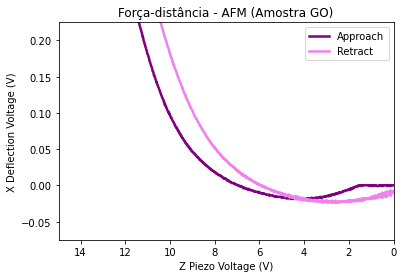

In [459]:
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
df_GO.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax5, kind = 'line', linewidth = 2.5, color = 'purple')
df_GO.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax5, kind = 'line', linewidth = 2.5, color = 'violet')
plt.title('Força-distância - AFM (Amostra GO)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(14.981, 0)
plt.ylim(-0.075, 0.225)
#plt.savefig('Força-distância - AFM (Amostra GO).png', dpi=100, format='png', facecolor='white')
plt.show()

In [460]:
df_setor_minimos_approach_GO = df_GO.loc[df_GO['def X approach'] < -0.001]

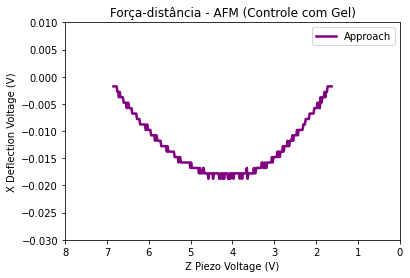

In [461]:
fig52 = plt.figure()
ax52 = fig52.add_subplot(111)
df_setor_minimos_approach_GO.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax52, kind = 'line', linewidth = 2.5, color = 'purple')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(8, 0)
plt.ylim(-0.03, 0.01)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

In [462]:
x = np.array(df_setor_minimos_approach_GO['Z approach'])
y = list(df_setor_minimos_approach_GO['def X approach'])

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

print(poly_reg_model.coef_)

print(poly_reg_model.intercept_)

a = poly_reg_model.coef_[1]

b = poly_reg_model.coef_[0]

c = poly_reg_model.intercept_

y_predicted = poly_reg_model.predict(poly_features)

#y_predicted

Z_approach_GO_min = [-b/(2*a)]

def_X_approach_GO_min = [-(b**2 - 4*a*c)/(4*a)]

print(Z_approach_GO_min, def_X_approach_GO_min)

[-0.02115456  0.0025129 ]
0.026311707897962222
[4.2091997554513405] [-0.018210178687810472]


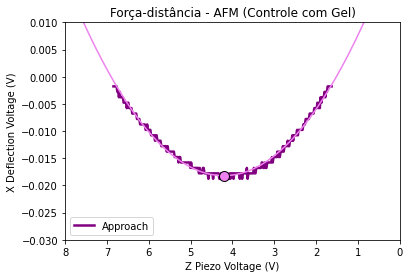

In [463]:
def I(t):
    return c + b*t + a*(t**2)

t = np.linspace(0, 15, 100)

fig531 = plt.figure()
ax531 = fig531.add_subplot(111)
df_setor_minimos_approach_GO.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax531, kind = 'line', linewidth = 2.5, color = 'purple')
plt.plot(t, I(t), color='violet')
#plt.plot(x, y_predicted, c = 'red')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_approach_GO_min, def_X_approach_GO_min, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="violet")
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(8, 0)
plt.ylim(-0.03, 0.01)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

In [464]:
limite = df_GO.loc[799]['def X retract']

df_setor_minimos_retract_GO = df_GO.loc[df_GO['def X retract'] < limite]

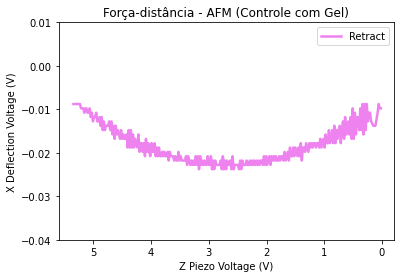

In [465]:
fig54 = plt.figure()
ax54 = fig54.add_subplot(111)
df_setor_minimos_retract_GO.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax54, kind = 'line', linewidth = 2.5, color = 'violet')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(5.6, -0.2)
plt.ylim(-0.04, 0.01)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

In [466]:
x = np.array(df_setor_minimos_retract_GO['Z retract'])
y = list(df_setor_minimos_retract_GO['def X retract'])

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

print(poly_reg_model.coef_)

print(poly_reg_model.intercept_)

a_ret = poly_reg_model.coef_[1]

b_ret = poly_reg_model.coef_[0]

c_ret = poly_reg_model.intercept_

y_predicted = poly_reg_model.predict(poly_features)

#y_predicted

Z_retract_GO_min = [-b_ret/(2*a_ret)]

def_X_retract_GO_min = [-(b_ret**2 - 4*a_ret*c_ret)/(4*a_ret)]


print(Z_retract_GO_min, def_X_retract_GO_min)

[-0.010329    0.00195478]
-0.009019080563964048
[2.6419881326881507] [-0.022663624397748015]


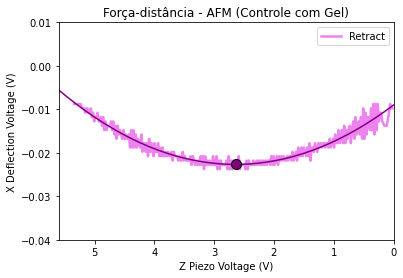

In [467]:
def I_ret(t):
    return c_ret + b_ret*t + a_ret*(t**2)

t = np.linspace(0, 15, 100)

fig532 = plt.figure()
ax532 = fig532.add_subplot(111)
df_setor_minimos_retract_GO.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax532, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(t, I_ret(t), color='purple')
#plt.plot(x, y_predicted, c = 'red')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_retract_GO_min, def_X_retract_GO_min, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="purple")
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(5.6, 0)
plt.ylim(-0.04, 0.01)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

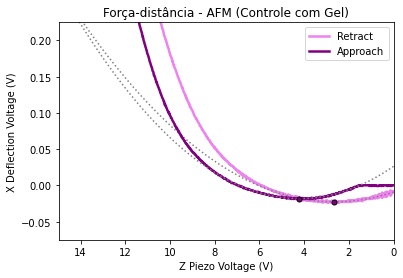

In [468]:
fig512 = plt.figure()
ax512 = fig512.add_subplot(111)
df_GO.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax512, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(t, I_ret(t), color='gray', linestyle='dotted')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax3, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_retract_GO_min, def_X_retract_GO_min, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="purple")
df_GO.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax512, kind = 'line', linewidth = 2.5, color = 'purple')
plt.plot(t, I(t), color='gray', linestyle='dotted')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax3, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_approach_GO_min, def_X_approach_GO_min, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="purple")
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(14.981, 0)
plt.ylim(-0.075, 0.225)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

#### Amostra rGO

Primeiro, foi necessário entender como estavam os dados obtidos.

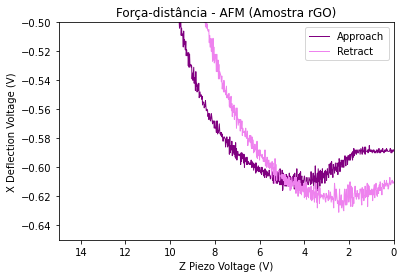

In [469]:
fig7 = plt.figure()
ax7 = fig7.add_subplot(111)
df_rGO.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax7, kind = 'line', linewidth = 1, color = 'purple')
df_rGO.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax7, kind = 'line', linewidth = 1, color = 'violet')
plt.title('Força-distância - AFM (Amostra rGO)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(14.981, 0)
plt.ylim(-0.65, -0.5)
#plt.savefig('Força-distância - AFM (Amostra rGO).png', dpi=100, format='png', facecolor='white')
plt.show()

In [470]:
logic = df_rGO["Z approach"] <= 1.5
linha_zero_rGO = df_rGO["def X approach"].loc[logic].mean()
novo_valor_y = df_rGO["def X approach"].values - linha_zero_rGO
df_rGO["def X approach"] = novo_valor_y

novo_valor_y = df_rGO["def X retract"].values - linha_zero_rGO
df_rGO["def X retract"] = novo_valor_y

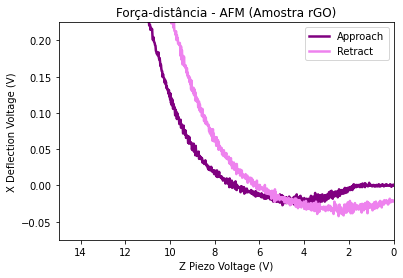

In [471]:
fig8 = plt.figure()
ax8 = fig8.add_subplot(111)
df_rGO.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax8, kind = 'line', linewidth = 2.5, color = 'purple')
df_rGO.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax8, kind = 'line', linewidth = 2.5, color = 'violet')
plt.title('Força-distância - AFM (Amostra rGO)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(14.981, 0)
plt.ylim(-0.075, 0.225)
#plt.savefig('Força-distância - AFM (Amostra rGO).png', dpi=100, format='png', facecolor='white')
plt.show()

In [472]:
df_setor_minimos_approach_rGO = df_rGO.loc[df_rGO['def X approach'] < -0.003]

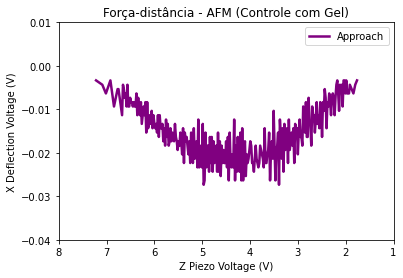

In [473]:
fig82 = plt.figure()
ax82 = fig82.add_subplot(111)
df_setor_minimos_approach_rGO.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax82, kind = 'line', linewidth = 2.5, color = 'purple')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(8, 1)
plt.ylim(-0.04, 0.01)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

In [474]:
x = np.array(df_setor_minimos_approach_rGO['Z approach'])
y = list(df_setor_minimos_approach_rGO['def X approach'])

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

print(poly_reg_model.coef_)

print(poly_reg_model.intercept_)

a = poly_reg_model.coef_[1]

b = poly_reg_model.coef_[0]

c = poly_reg_model.intercept_

y_predicted = poly_reg_model.predict(poly_features)

#y_predicted

Z_approach_rGO_min = [-b/(2*a)]

def_X_approach_rGO_min = [-(b**2 - 4*a*c)/(4*a)]

print(Z_approach_rGO_min, def_X_approach_rGO_min)

[-0.02381147  0.00270843]
0.03153544453386064
[4.395807241093171] [-0.020799870502644823]


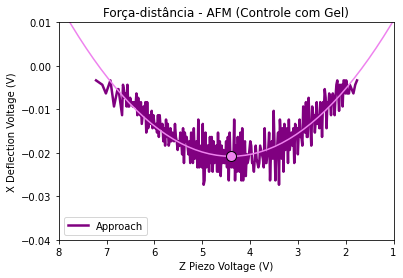

In [475]:
def I(t):
    return c + b*t + a*(t**2)

t = np.linspace(0, 15, 100)

fig831 = plt.figure()
ax831 = fig831.add_subplot(111)
df_setor_minimos_approach_rGO.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax831, kind = 'line', linewidth = 2.5, color = 'purple')
plt.plot(t, I(t), color='violet')
#plt.plot(x, y_predicted, c = 'red')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_approach_rGO_min, def_X_approach_rGO_min, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="violet")
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(8, 1)
plt.ylim(-0.04, 0.01)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

In [476]:
limite = df_rGO.loc[799]['def X retract'] - 0.001

df_setor_minimos_retract_rGO = df_rGO.loc[df_rGO['def X retract'] < limite]

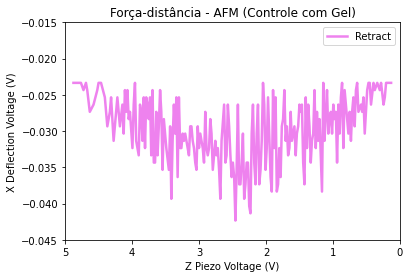

In [477]:
fig84 = plt.figure()
ax84 = fig84.add_subplot(111)
df_setor_minimos_retract_rGO.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax84, kind = 'line', linewidth = 2.5, color = 'violet')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(5, 0)
plt.ylim(-0.045, -0.015)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

In [478]:
x = np.array(df_setor_minimos_retract_rGO['Z retract'])
y = list(df_setor_minimos_retract_rGO['def X retract'])

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

print(poly_reg_model.coef_)

print(poly_reg_model.intercept_)

a_ret = poly_reg_model.coef_[1]

b_ret = poly_reg_model.coef_[0]

c_ret = poly_reg_model.intercept_

y_predicted = poly_reg_model.predict(poly_features)

#y_predicted

Z_retract_rGO_min = [-b_ret/(2*a_ret)]

def_X_retract_rGO_min = [-(b_ret**2 - 4*a_ret*c_ret)/(4*a_ret)]


print(Z_retract_rGO_min, def_X_retract_rGO_min)

[-0.00891087  0.00179883]
-0.021568852047242064
[2.4768554054859138] [-0.03260432618349381]


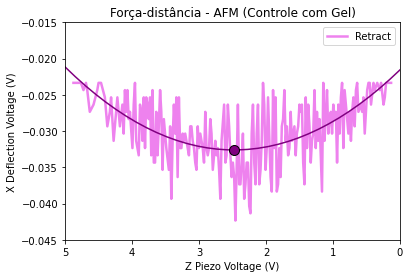

In [479]:
def I_ret(t):
    return c_ret + b_ret*t + a_ret*(t**2)

t = np.linspace(0, 15, 100)

fig832 = plt.figure()
ax832 = fig832.add_subplot(111)
df_setor_minimos_retract_rGO.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax832, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(t, I_ret(t), color='purple')
#plt.plot(x, y_predicted, c = 'red')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax23, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_retract_rGO_min, def_X_retract_rGO_min, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="purple")
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(5, 0)
plt.ylim(-0.045, -0.015)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

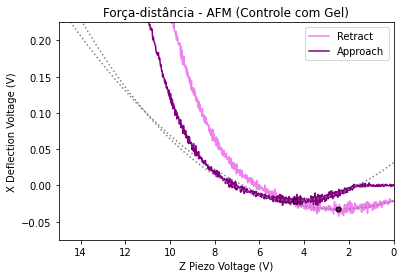

In [480]:
fig812 = plt.figure()
ax812 = fig812.add_subplot(111)
df_rGO.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax812, kind = 'line', linewidth = 1.5, color = 'violet')
plt.plot(t, I_ret(t), color='gray', linestyle='dotted')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax3, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_retract_rGO_min, def_X_retract_rGO_min, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="purple")
df_rGO.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=ax812, kind = 'line', linewidth = 1.5, color = 'purple')
plt.plot(t, I(t), color='gray', linestyle='dotted')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=ax3, kind = 'line', linewidth = 2.5, color = 'violet')
plt.plot(Z_approach_rGO_min, def_X_approach_rGO_min, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="purple")
plt.title('Força-distância - AFM (Controle com Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(14.981, 0)
plt.ylim(-0.075, 0.225)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

## Força de Adesão

Para encontrar a força de adesão é necessário saber quais são os pontos mínimos no approach e no retract

In [481]:
delta_Z_cont_g = abs(Z_approach_cont_g_min[0] - Z_retract_cont_g_min[0])

delta_Z_cont_g_m = delta_Z_cont_g*(20/75)*1e-6

forca_de_adesao_cont_g = delta_Z_cont_g_m*(0.2)

print("A Força de Adesão da amostra controle é igual a", forca_de_adesao_cont_g, "N/m")

delta_Z_GO = abs(Z_approach_GO_min[0] - Z_retract_GO_min[0])

delta_Z_GO_m = delta_Z_GO*(20/75)*1e-6

forca_de_adesao_GO = delta_Z_GO_m*(0.2)

print("A Força de Adesão da amostra modificada com Óxido de Grafeno é igual a", forca_de_adesao_GO, "N/m")

delta_Z_rGO = abs(Z_approach_rGO_min[0] - Z_retract_rGO_min[0])

delta_Z_rGO_m = delta_Z_rGO*(20/75)*1e-6

forca_de_adesao_rGO = delta_Z_rGO_m*(0.2)

print("A Força de Adesão da amostra modificada com Óxido de Grafeno reduzido é igual a", forca_de_adesao_rGO, "N/m")

A Força de Adesão da amostra controle é igual a 5.0435426662630306e-08 N/m
A Força de Adesão da amostra modificada com Óxido de Grafeno é igual a 8.358461988070346e-08 N/m
A Força de Adesão da amostra modificada com Óxido de Grafeno reduzido é igual a 1.0234409789905369e-07 N/m


### Testes

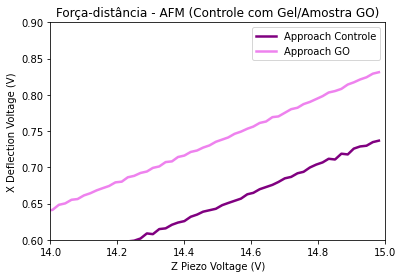

In [482]:
figteste1 = plt.figure()
axteste1 = figteste1.add_subplot(111)
df_cont_g.plot('Z approach','def X approach',legend=True, label = 'Approach Controle', ax=axteste1, kind = 'line', linewidth = 2.5, color = 'purple')
#df_cont_g.plot('Z retract','def X retract',legend=True, label = 'Retract Controle', ax=ax5, kind = 'line', linewidth = 2.5, color = 'red')
df_GO.plot('Z approach','def X approach',legend=True, label = 'Approach GO', ax=axteste1, kind = 'line', linewidth = 2.5, color = 'violet')
#df_GO.plot('Z retract','def X retract',legend=True, label = 'Retract GO', ax=ax5, kind = 'line', linewidth = 2.5, color = 'pink')

plt.title('Força-distância - AFM (Controle com Gel/Amostra GO)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(14, 15)
plt.ylim(0.6, 0.9)
#plt.savefig('Força-distância - AFM (Controle com Gel).png', dpi=100, format='png', facecolor='white')
plt.show()

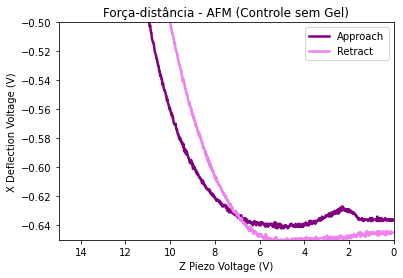

In [483]:
figteste2 = plt.figure()
axteste2 = figteste2.add_subplot(111)
df_cont_sg.plot('Z approach','def X approach',legend=True, label = 'Approach', ax=axteste2, kind = 'line', linewidth = 2.5, color = 'purple')
df_cont_sg.plot('Z retract','def X retract',legend=True, label = 'Retract', ax=axteste2, kind = 'line', linewidth = 2.5, color = 'violet')
plt.title('Força-distância - AFM (Controle sem Gel)')
plt.xlabel('Z Piezo Voltage (V)')
plt.ylabel('X Deflection Voltage (V)')
plt.xlim(14.981, 0)
plt.ylim(-0.65, -0.5)
#plt.savefig('Força-distância - AFM (Controle sem Gel).png', dpi=100, format='png', facecolor='white')
plt.show()